# TOPIC Modelling
Ce notebook est très fortement inspiré de cet exemple: https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [1]:
import pandas as pd
import numpy as np
import spacy

## Import des données
Les données suivantes sont des données importées de discussions sur le suicide de la plateforme Reddit

In [2]:
df = pd.read_json("SuicideWatch.json")
df = df.rename(columns={df.columns[0]:"title",df.columns[1]:"text"})
df.head()

,title,text
0,New wiki on how to avoid accidentally encourag...,We've been seeing a worrying increase in pro-s...
1,Please remember that NO ACTIVISM of any kind i...,"Activism, i.e. advocating or fundraising for s..."
2,I don't wanna live but i don't have balls to k...,i think i have finnaly lost my mind it's fucki...
3,i just want someone to hold me and tell me eve...,someone to love me
4,People really don't realise how much their com...,Knew a girl that I used to be really good frie...


In [3]:
# Ajout de colonnes sur la longueur des textes
df['title_length'] = df.title.apply(lambda x: len(x))
df['text_length'] = df.text.apply(lambda x: len(x))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         992 non-null    object
 1   text          992 non-null    object
 2   title_length  992 non-null    int64 
 3   text_length   992 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [5]:
df.head()

,title,text,title_length,text_length
0,New wiki on how to avoid accidentally encourag...,We've been seeing a worrying increase in pro-s...,92,10633
1,Please remember that NO ACTIVISM of any kind i...,"Activism, i.e. advocating or fundraising for s...",83,949
2,I don't wanna live but i don't have balls to k...,i think i have finnaly lost my mind it's fucki...,57,535
3,i just want someone to hold me and tell me eve...,someone to love me,68,18
4,People really don't realise how much their com...,Knew a girl that I used to be really good frie...,57,278


## Nettoyage avec Spacy
-  Lemmatisation
-  Stopwords

In [6]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pyLDAvis

import spacy
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")




In [7]:
# Récupère les tweets des sujets à risque

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

docs = (nlp(text) for text in df.text)
corpus = []
for tweet in lemmatizer.pipe(docs, batch_size=50):
    corpus.append(" ".join([w.lemma_ for w in tweet if not w.is_stop and not w.like_num]))

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# corpus

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Les mots qui apparaissent moins de 3 fois sont supprimés, 
vectorizer = CountVectorizer(
                            input = 'content',
                            lowercase = True,
                            stop_words = 'english',
                            min_df=1,
                            max_df= 0.7,
                            max_features=1000,
                            )

doc_term_matrix = vectorizer.fit_transform(corpus)

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Check the Sparcity

In [9]:
# Materialize the sparse data
data_dense = doc_term_matrix.todense()
print(doc_term_matrix.size)

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

33347
Sparsicity:  3.361592741935484 %


D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA
le nombre de composants de départ choisi correspond aux 12 facteurs analysés dans l'article par S. Fodeh, J. Goulet, C. Brandt, H. Al-Tabib, p.2

In [10]:
lda_model = LatentDirichletAllocation(n_components=12,
                                      max_iter=10,
                                      learning_method='online',
                                      random_state=666,
                                     evaluate_every = -1,
                                     n_jobs=-1,
                                     )
lda_output = lda_model.fit_transform(doc_term_matrix)

print(lda_model)  # Model attributes

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_method='online', n_components=12, n_jobs=-1,
                          random_state=666)


### Diagnostique du modèle

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(doc_term_matrix))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(doc_term_matrix))

# See model parameters
print(lda_model.get_params())

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Log Likelihood:  -294030.14238366915
Perplexity:  539.0554466281466
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 12, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 666, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


### Recherche des meilleurs paramètres

In [12]:
from sklearn.model_selection import GridSearchCV
search_params = {'n_components': [5, 6, 7,8,9,10], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(doc_term_matrix)

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9, 10]})

In [13]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(doc_term_matrix))

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -64437.970651163196
Model Perplexity:  505.9740423835953


In [14]:
result_df = pd.DataFrame(model.cv_results_)

log_likelyhoods_5 = result_df[result_df["param_learning_decay"]==0.5]["mean_test_score"]
log_likelyhoods_7 = result_df[result_df["param_learning_decay"]==0.7]["mean_test_score"]
log_likelyhoods_9 =  result_df[result_df["param_learning_decay"]==0.9]["mean_test_score"]

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


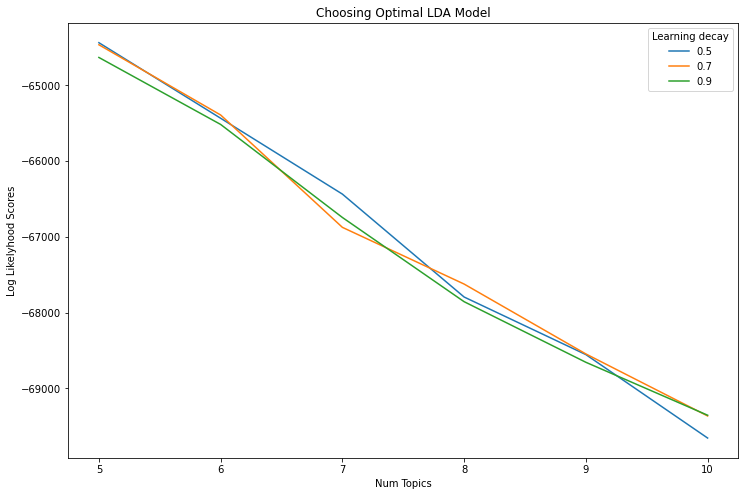

In [15]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [5,6,7,8,9,10]
# log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.5]
# log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
# log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

## Classifier un document selon son topic
### Vérifier le topic dominant de chaque document en regardant lequel à la plus haute contribution pour chaqun des documents

In [19]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(doc_term_matrix)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(corpus))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.880000,0.000000,0.000000,0.000000,0.110000,0
Doc1,0.320000,0.010000,0.660000,0.010000,0.010000,2
Doc2,0.010000,0.400000,0.010000,0.010000,0.590000,4
Doc3,0.590000,0.100000,0.100000,0.100000,0.100000,0
Doc4,0.010000,0.010000,0.490000,0.480000,0.010000,2
Doc5,0.000000,0.360000,0.000000,0.000000,0.630000,4
Doc6,0.010000,0.260000,0.010000,0.720000,0.010000,3
Doc7,0.860000,0.000000,0.000000,0.000000,0.130000,0
Doc8,0.010000,0.010000,0.010000,0.140000,0.840000,4
Doc9,0.000000,0.000000,0.000000,0.000000,0.990000,4


#### Distribution des topics

In [20]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic Num,Num Documents
0,4,293
1,2,275
2,0,231
3,1,124
4,3,69


## Visualisations

In [21]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, doc_term_matrix, vectorizer, mds='tsne')
panel

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  29.388544
2       51.163364 -159.968018       2        1  28.555419
1      -73.144554   21.523815       3        1  15.466305
0      -66.410133 -110.606438       4        1  14.262948
3       54.417324   12.443444       5        1  12.326784, topic_info=      Term         Freq        Total Category  logprob  loglift
961   want  1129.000000  1129.000000  Default  30.0000  30.0000
582    mom   166.000000   166.000000  Default  29.0000  29.0000
615     nt   344.000000   344.000000  Default  28.0000  28.0000
517   life   759.000000   759.000000  Default  27.0000  27.0000
370   fuck   314.000000   314.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
961   want    56.332230  1129.207632   Topic5  -4.6278  -0.9046
52     ask    29.982537   122.354501   Topic5  -5.2585   0.6871
501   know    40.722502   803.802463   Topic5  -4.9523  -0.8892
894  think    36.978565   618.575219   Topic5  -5.0488  -0.7237
526   live    34.310806   419.707616   Topic5  -5.1236  -0.4107

[373 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         4  0.100883   25igd7
0         5  0.807063   25igd7
1         1  0.775652  abandon
1         4  0.172367  abandon
2         1  0.252905     able
...     ...       ...      ...
995       3  0.197948     year
995       4  0.033339     year
995       5  0.181279     year
996       1  0.296102     yell
996       5  0.676805     yell

[851 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

### Retrouver les mots clés des topics

In [38]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,able,actually,ago,alive,anxiety,anymore,ask,away,bad,care,...,understand,wake,want,way,week,wish,wo,work,world,year
Topic0,0.640851,0.083336,0.083336,0.083337,0.083336,41.366188,5.066279,1.439716,15.311273,46.444254,...,5.573163,0.083336,27.707211,2.169544,0.212947,0.083337,0.083339,2.956483,0.083338,3.208658
Topic1,5.105846,0.179128,33.054584,22.318528,2.702719,14.991262,0.083357,21.224635,8.550786,41.259669,...,0.083740,5.213378,43.127835,19.160539,21.107902,0.488184,0.127443,124.711715,31.064380,70.119102
Topic2,0.083335,0.083338,10.271989,1.337359,2.242210,6.950910,0.083336,7.137742,5.222689,26.102722,...,2.533626,5.300525,1.054878,21.167346,1.077236,14.166694,8.343852,0.083335,16.599207,7.868535
Topic3,20.352035,0.083335,24.533497,3.581259,42.993940,38.690360,10.895242,16.895962,101.599938,0.091762,...,3.330835,38.796989,50.259108,7.565538,10.473231,0.083336,13.796748,0.162570,4.873682,12.426344
Topic4,0.418395,0.083336,3.308295,33.035996,0.830523,6.806637,3.568314,12.688130,2.948524,35.398650,...,9.737409,3.496720,459.955168,35.916569,0.083336,14.230456,55.740981,1.444517,0.328200,6.850429


In [23]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,want,life,die,people,know,care,live,tired,feel,pain,love,end,like,anymore,fuck,death,help,way,suicide,try
Topic 1,like,want,life,feel,friend,people,year,family,school,think,live,know,help,job,tell,die,work,thing,try,end
Topic 2,feel,like,think,know,time,want,life,year,thing,day,try,bad,friend,thought,way,good,talk,end,people,suicide
Topic 3,mom,tell,time,start,year,say,sister,try,family,want,home,dad,brother,week,night,day,work,talk,friend,parent
Topic 4,like,want,know,nt,feel,fuck,try,life,thing,people,think,bad,fucking,help,time,anymore,kill,year,hate,live


# Prédire le topic pour un nouveau Tweet

In [40]:
# # Define function to predict topic for a given text document.
# nlp = spacy.load('en', disable=['parser', 'ner'])

# def predict_topic(text, nlp=nlp):
#     global sent_to_words
#     global lemmatization

#     # Step 1: Clean with simple_preprocess
#     mytext_2 = list(sent_to_words(text))

#     # Step 2: Lemmatize
#     mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#     # Step 3: Vectorize transform
#     mytext_4 = vectorizer.transform(mytext_3)

#     # Step 4: LDA Transform
#     topic_probability_scores = best_lda_model.transform(mytext_4)
#     topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
#     return topic, topic_probability_scores

# # Predict the topic
# mytext = ["Some text about christianity and bible"]
# topic, prob_scores = predict_topic(text = mytext)
# print(topic)

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Component's weights: 
 [[ 0.3   0.2   0.56  0.15  0.73]
 [ 0.15  0.07  0.74  0.03 -0.65]]
Perc of Variance Explained: 
 [0.07 0.38]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

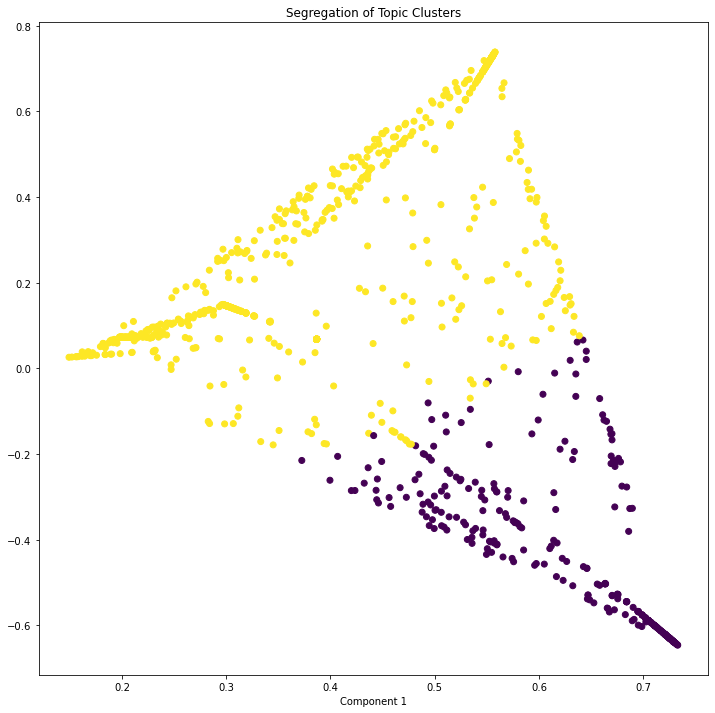

In [24]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

clusters = KMeans(n_clusters=2, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [27]:
lda_model = LatentDirichletAllocation(n_components=7, random_state=888)
lda_model.fit(doc_term_matrix)
data = pyLDAvis.sklearn.prepare(lda_model, doc_term_matrix, vectorizer, mds='tsne')
# Visualization can be displayed in the notebook
pyLDAvis.display(data)

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
pyLDAvis.save_html(data, 'LDA_7tops')

D:\A756805\Anaconda3\envs\twitter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import adjusted_rand_score, homogeneity_completeness_v_measure 

print(len(s.at_risk),(df_document_topic.dominant_topic == 0).sum())
print(adjusted_rand_score(s.at_risk, df_document_topic.dominant_topic))
print(homogeneity_completeness_v_measure(s.at_risk, df_document_topic.dominant_topic))

In [ ]:
print(adjusted_rand_score(s.at_risk, clusters))
print(homogeneity_completeness_v_measure(s.at_risk, clusters))